 # <span style='color :steelblue;font-size:35px' >Unsupervised Project</span> 

 # <span style='color :steelblue;font-size:25px' >PART-3</span>

#### DOMAIN: Automobile 
- **CONTEXT:** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
The vehicle may be viewed from one of many different angles.
- **DATA DESCRIPTION:** The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles 
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of 
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more 
difficult to distinguish between the cars.
- All the features are numeric i.e. geometric features extracted from the silhouette.
- **PROJECT OBJECTIVE:** Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the 
model using just the raw data.
- **Steps and tasks:** 
  1. Data: Import, clean and pre-process the data
  2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden 
patterns by using all possible methods.
For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used 
for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. 
  3. Classifier: Design and train a best fit SVM classier using all the data attributes.
  4. Dimensional reduction: perform dimensional reduction on the data.
  5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.
  6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case

## 1. Import and warehouse data:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import time

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

#color change for print statement etc.
from colorama import Fore
from sklearn.decomposition import PCA

from sklearn.metrics import f1_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve, precision_score, accuracy_score

import warnings as wn
wn.filterwarnings('ignore')

### Load dataset

In [2]:
automobile_data = pd.read_csv("Part3-vehicle.csv")

### Check the shape and Size of the Datasets

In [3]:
#check the sample data for the dataframe
print('Shape of telecome_df1:',automobile_data.shape)
automobile_data.head()

Shape of telecome_df1: (846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

- **There are 846 rows and 19 columns.**

## 2.Data cleansing:

In [4]:
# Also we can use info to check the data types and other details of data
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

- **All the variables except class are numberic in nature. class is object type.**
- **Also from count of each column it looks like some null data points present in dataset.**

### i.Check the missing value

In [5]:
#check if any column have missing value
#Fucniton to check the missing value
def missing_val(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value found.')

- **most of columns have some missing vlaues.**

### Handling of missing value

In [7]:
# Fill median with the missing value 
automobile_data.fillna(round(automobile_data.median(), 2), inplace=True)

- **Fill all the missing value with median for that variable.**

In [8]:
#Re-check if any missing value still there
missing_val(automobile_data)

There is no missing value found.


- **Now the data is clean and no missing value is present in dataset**

In [9]:
#keep one backup of the data set
automobile_data_bk = automobile_data.copy()

## 3.Data analysis & Visualisation:

### i.5 Point summary of numerical attributes

In [10]:
#use describe funciton to check the descriptive statistics of the numberical variables
automobile_data.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

#### Observation:
- scaled_radius_of_gyration.1,skewness_about,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio  data looks right skewed. Since there is gap between mean and median.
- Rest of variable looks like mean and median nearly same. 
- All are condinuous variables


### ii. Univeriate analayis for continuous variables

In [11]:
#function for histplot
def hist_plot(df, col, sub_pos):    
    if(sub_pos == 1):
        plt.figure(figsize=(25,6))  
        colr = 'green'
    elif(sub_pos == 2):
        colr = 'blue'
    else:
        colr = 'purple'
        
    plt.subplot(1, 3, sub_pos)
    sns.histplot(df[col], kde= True, color=colr, edgecolor = 'black');

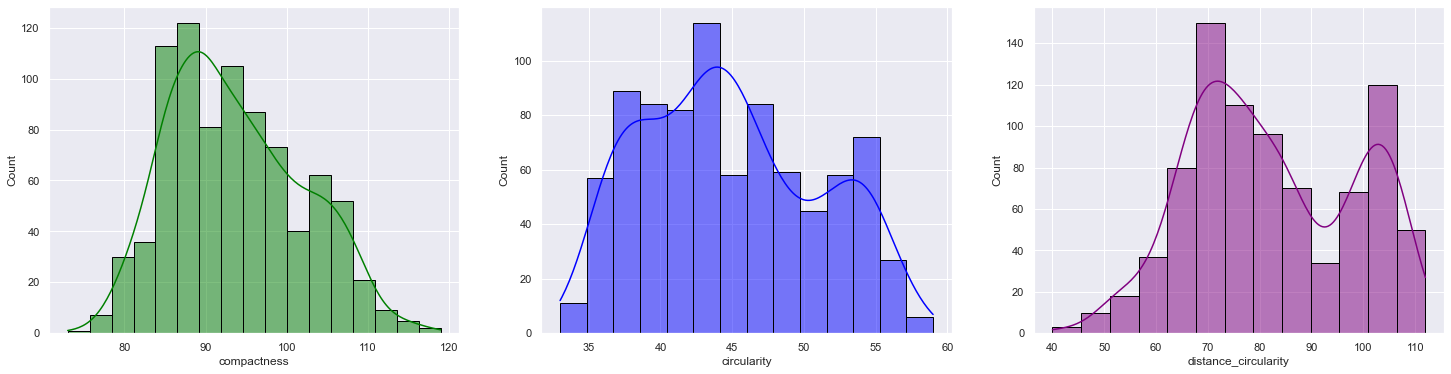

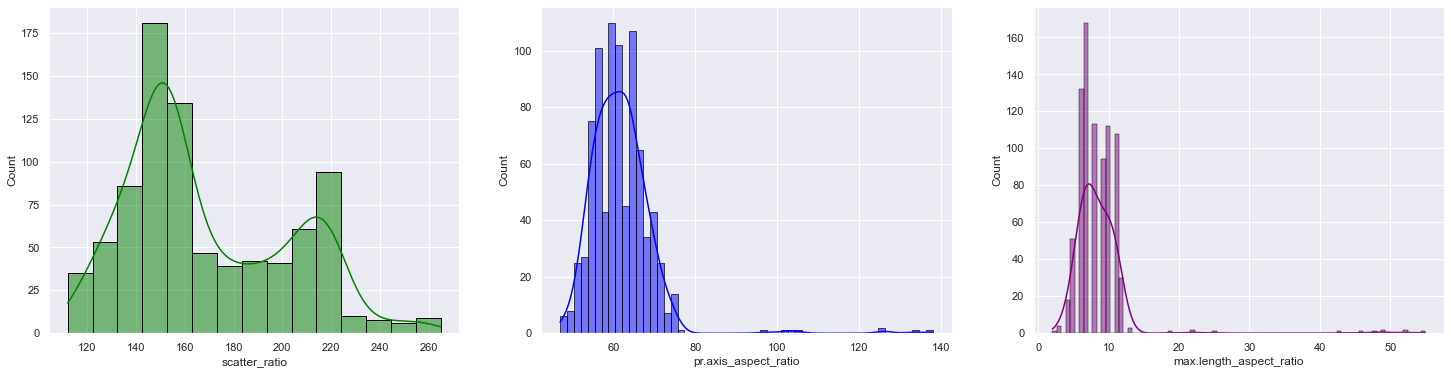

In [12]:
hist_plot(automobile_data, 'compactness', 1)
hist_plot(automobile_data, 'circularity', 2)
hist_plot(automobile_data, 'distance_circularity', 3)

hist_plot(automobile_data, 'scatter_ratio', 1)
hist_plot(automobile_data, 'pr.axis_aspect_ratio', 2)
hist_plot(automobile_data, 'max.length_aspect_ratio', 3)

- compactness is normally distributed, with very little skewed to right.
- distance_circularity is little left skewed.
- scatter_ratio is right skewed.
- pr.axis_aspect_ratio and max.length_aspect_ratio both are right skewed and have some outliers. Both are Leptokurtic distribution of data.

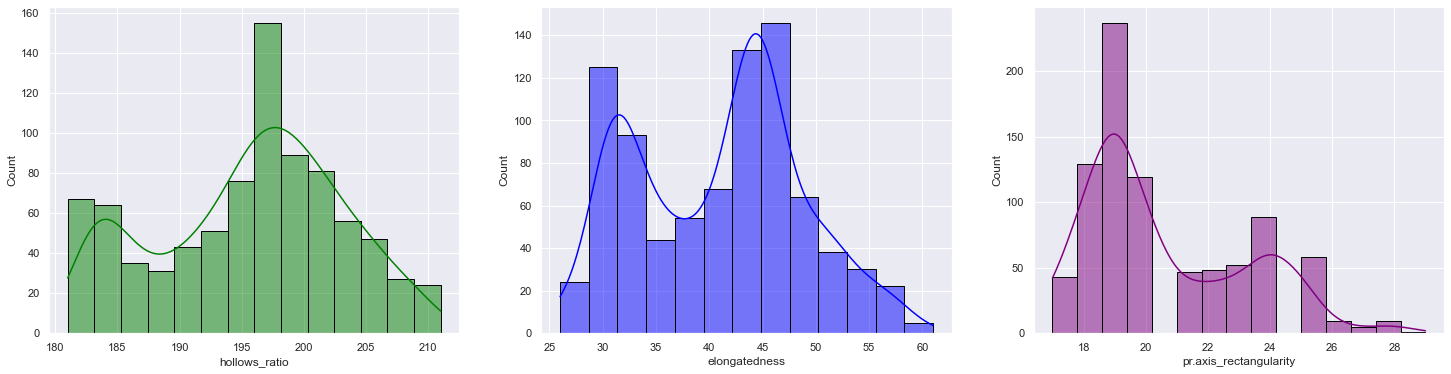

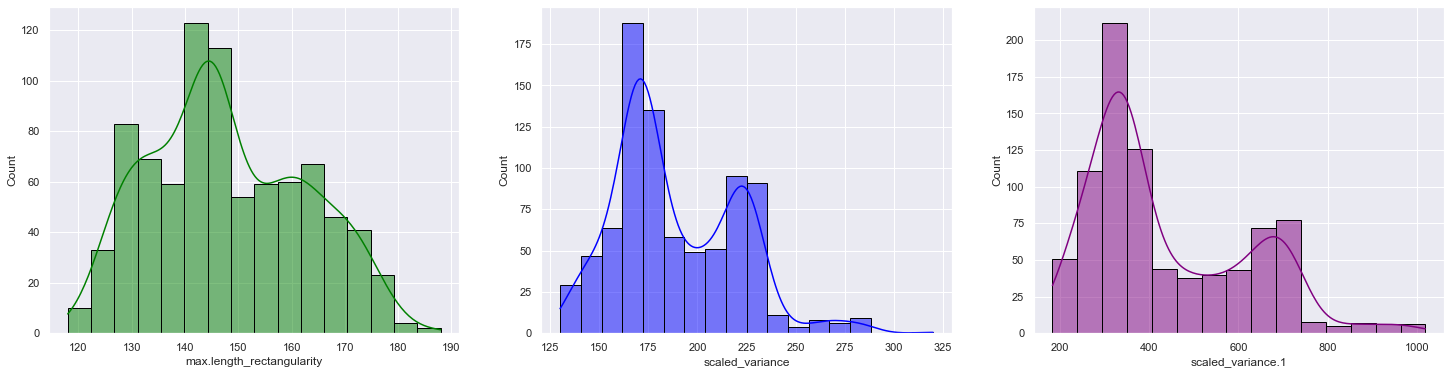

In [13]:
hist_plot(automobile_data, 'hollows_ratio', 1)
hist_plot(automobile_data, 'elongatedness', 2)
hist_plot(automobile_data, 'pr.axis_rectangularity', 3)

hist_plot(automobile_data, 'max.length_rectangularity', 1)
hist_plot(automobile_data, 'scaled_variance', 2)
hist_plot(automobile_data, 'scaled_variance.1', 3)

- hollows_ratio more left skewed.
- elongatedness distribution have two gussian and little right skewed.
- pr.axis_rectangularity, max.length_rectangularity,scaled_variance and  scaled_variance.1 is right skewed.

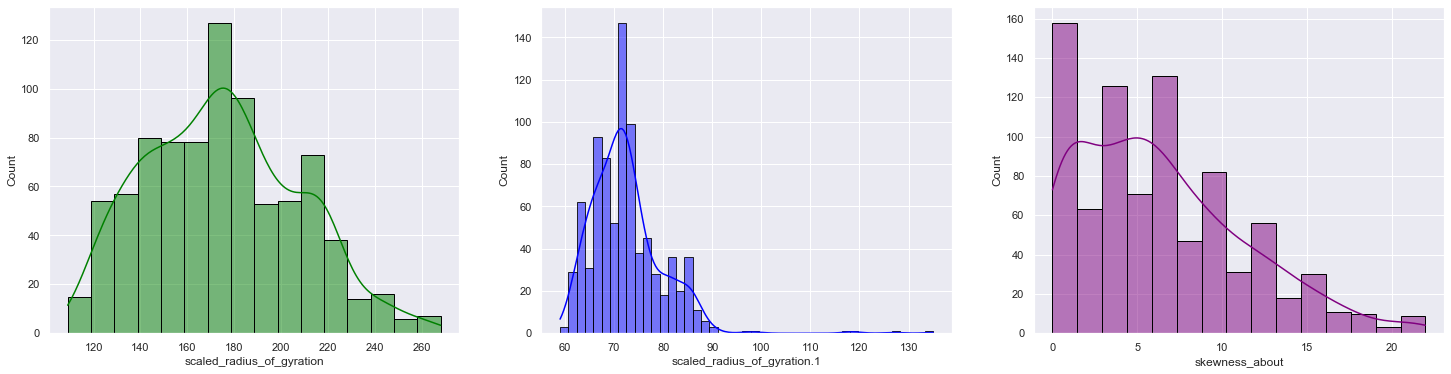

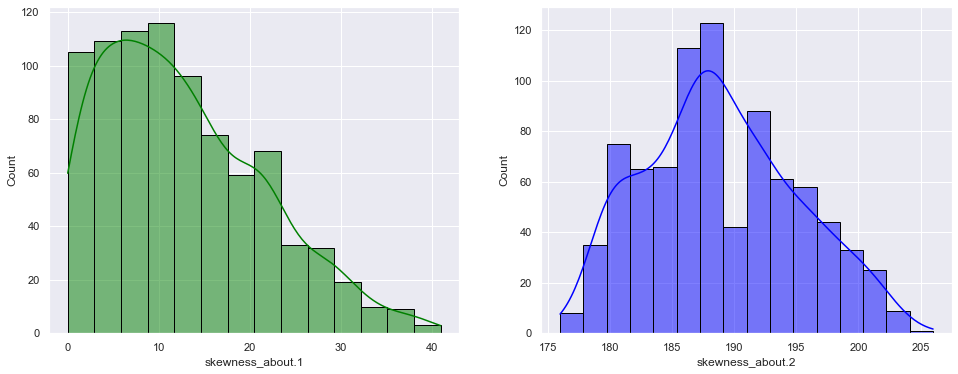

In [14]:
hist_plot(automobile_data, 'scaled_radius_of_gyration', 1)
hist_plot(automobile_data, 'scaled_radius_of_gyration.1', 2)
hist_plot(automobile_data, 'skewness_about', 3)

hist_plot(automobile_data, 'skewness_about.1', 1)
hist_plot(automobile_data, 'skewness_about.2', 2)

- scaled_radius_of_gyration is little right skewed.
- scaled_radius_of_gyration.1 both left and right skewed.
- skewness_about uniformaly distributed with high no.of data points between 0 to 2.
- 'skewness_about.1', 'skewness_about.2' both right skewed.

car    429
bus    218
van    199
Name: class, dtype: int64


<AxesSubplot:>

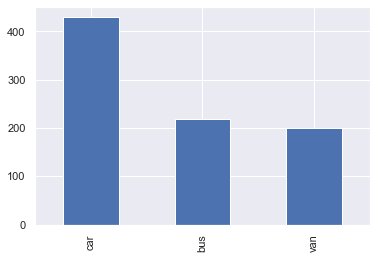

In [15]:
## Distribution of target variable 
print(automobile_data['class'].value_counts())
automobile_data['class'].value_counts().plot(kind='bar')

- Car have higher no.of records followe by bus and van.

###  Box plot to check Outliers

In [16]:
#Box plot to check if any outliers in data
#define one fucniton to do box plot
def box_plot(data, columnlist):
    dataset = data
    column_list = columnlist
    length_columnlist = len(columnlist)
    
    #plot colors
    colors_list = ['lightgreen', 'lightblue', 'pink']
    
    if(length_columnlist > 3):
        length_columnlist = 3
    
    #plot the graph
    plt.figure(figsize=(15, 10))
    for i in range(length_columnlist):
        plt.subplot(3, 3, i+1)
        sns.boxplot(data= dataset, x = column_list[i], color = colors_list[i] )

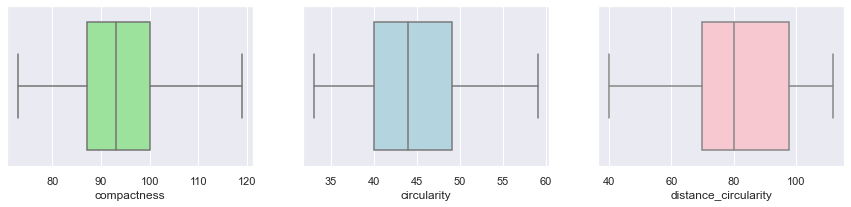

In [17]:
#box plot  
box_plot(automobile_data, ['compactness', 'circularity', 'distance_circularity'])

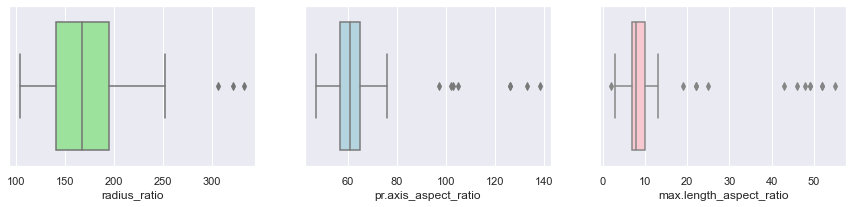

In [18]:
#box plot  
box_plot(automobile_data, ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio'])

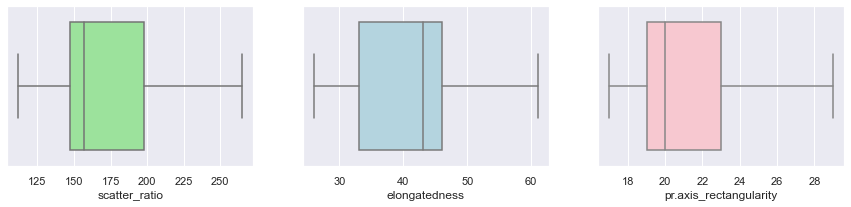

In [19]:
#box plot  
box_plot(automobile_data, ['scatter_ratio', 'elongatedness', 'pr.axis_rectangularity'])

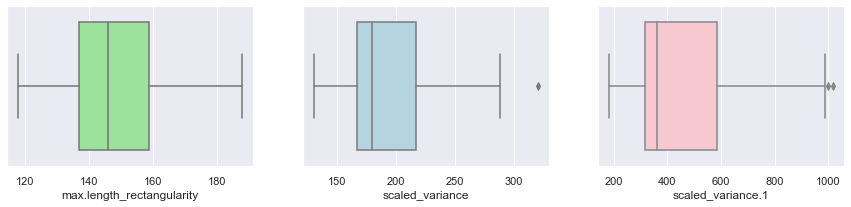

In [20]:
#box plot  
box_plot(automobile_data, ['max.length_rectangularity', 'scaled_variance', 'scaled_variance.1'])

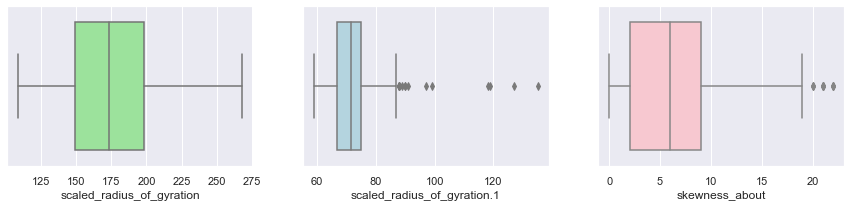

In [21]:
#box plot  
box_plot(automobile_data, ['scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about'])

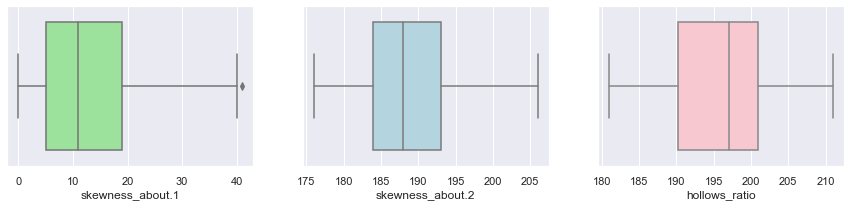

In [22]:
#box plot  
box_plot(automobile_data, ['skewness_about.1', 'skewness_about.2', 'hollows_ratio'])

#### Observation:
- As we observed from distribution plot.. most of variables are right skewed and few variables have some outliers, box plot give more details.
- scaled_radius_of_gyration.1,skewness_about,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio have some outliers. So we need to handle the outliers to get optimum accuracy from model.

### Check the Skewness and Outlierss:
- Below function check the outliers and skewness is data and also handle the outliers base on Quantile based chopping technique. 
- negetive outliers data poits replace with 10 percentile and positive outliers replaced with 90 percentile.

In [23]:
# define a function for identifying the outliers
def find_outliers(data, attribute):
    # sort the attribute
    data.sort_values(by=attribute)
    
    # quartile 25: indicates first quartile
    quartiles_25 = np.percentile(data[attribute], [25]) 
    
    # quartile 25: indicates first quartile
    min_val = min(data[attribute]) 
    max_val = min(data[attribute]) 
    
    # quartile 75: indicates third quartile
    quartiles_75 = np.percentile(data[attribute], [75])
    
    # inter quartile range
    IQR =  quartiles_75 - quartiles_25
    
    # find lower bound q1 - (1.5 *IQR)
    lower_fence = quartiles_25 - (1.5 * IQR)
    
    # find upper bound  q3 - (1.5 *IQR)
    upper_fence = quartiles_75  + (1.5 * IQR )
    print('')
    print ('Presense Of Outliers In ' + attribute.upper())
    print ('---------------------------')

    print (attribute + '     : quartile_75 : ', quartiles_75, 
           '\n'+ attribute+ ': quartile_25 : ', quartiles_25, 
           '\n'+ attribute+ ': IQR : ', IQR, 
           '\n'+ attribute+ ': lower_bound : ', lower_fence, 
           '\n'+ attribute+ ': upper_bound : ', upper_fence)
    
    print (attribute + ': Any data lower than : ', np.around(lower_fence, decimals = 2) , 
           ' and upper than :' , np.around(upper_fence, decimals = 2) , ' is considered as outlier')
    
    ##outliers
    upp_outlier = data[data[attribute].values > upper_fence][attribute]
    low_outlier = data[data[attribute].values < lower_fence][attribute]
    
    print('Outliers counts:',upp_outlier.count() + low_outlier.count())  
    
    #we can use Quantile-based Flooring and Capping techinque scale outliers
    quartiles_10 = np.percentile(data[attribute], [10])
    quartiles_90 = np.percentile(data[attribute], [90])
    data[attribute] = np.where(data[attribute].values < quartiles_10, quartiles_10, data[attribute])
    data[attribute] = np.where(data[attribute].values > quartiles_90, quartiles_90, data[attribute])

In [24]:
find_outliers(automobile_data,'radius_ratio')
find_outliers(automobile_data,'pr.axis_aspect_ratio')
find_outliers(automobile_data,'max.length_aspect_ratio')

find_outliers(automobile_data,'scaled_variance')
find_outliers(automobile_data,'scaled_variance.1')
find_outliers(automobile_data,'scaled_radius_of_gyration.1')

find_outliers(automobile_data,'scaled_variance')
find_outliers(automobile_data,'scaled_variance.1')
find_outliers(automobile_data,'skewness_about')



Presense Of Outliers In RADIUS_RATIO
---------------------------
radius_ratio     : quartile_75 :  [195.] 
radius_ratio: quartile_25 :  [141.] 
radius_ratio: IQR :  [54.] 
radius_ratio: lower_bound :  [60.] 
radius_ratio: upper_bound :  [276.]
radius_ratio: Any data lower than :  [60.]  and upper than : [276.]  is considered as outlier
Outliers counts: 3

Presense Of Outliers In PR.AXIS_ASPECT_RATIO
---------------------------
pr.axis_aspect_ratio     : quartile_75 :  [65.] 
pr.axis_aspect_ratio: quartile_25 :  [57.] 
pr.axis_aspect_ratio: IQR :  [8.] 
pr.axis_aspect_ratio: lower_bound :  [45.] 
pr.axis_aspect_ratio: upper_bound :  [77.]
pr.axis_aspect_ratio: Any data lower than :  [45.]  and upper than : [77.]  is considered as outlier
Outliers counts: 8

Presense Of Outliers In MAX.LENGTH_ASPECT_RATIO
---------------------------
max.length_aspect_ratio     : quartile_75 :  [10.] 
max.length_aspect_ratio: quartile_25 :  [7.] 
max.length_aspect_ratio: IQR :  [3.] 
max.length_aspect_ra

- **Above output give the detail information about the min and max range to find out the outliers and also same function handled the outliers.**

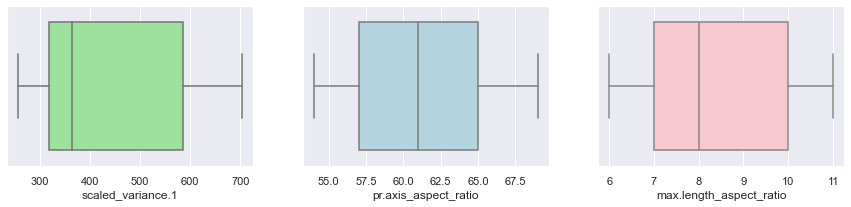

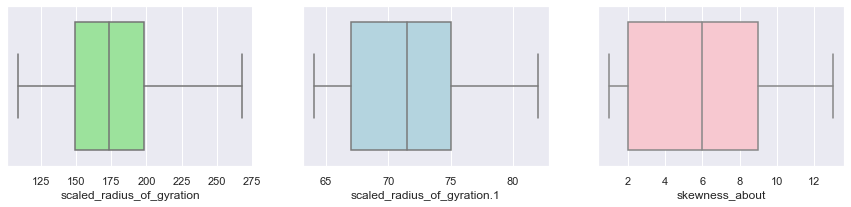

In [25]:
#Re-check the data after handled the outliers
box_plot(automobile_data, ['scaled_variance.1', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio'])
box_plot(automobile_data, ['scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about'])

- **As we observed there is no outliers in data.**

### Apply label encoding on target dataset

In [26]:
#Apply level encoding on target data since the target field is string type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
automobile_data['class'] = label_encoder.fit_transform(automobile_data['class'])

In [27]:
automobile_data['class'].value_counts().sort_index() #label encoding do ordering by alphabel order in case of string

0    218
1    429
2    199
Name: class, dtype: int64

- **bus labeled as 0.**
- **car labeled as 1.**
- **van labed as 2.**

## vi.Bivariate and Multivariate Analysis of data distribution

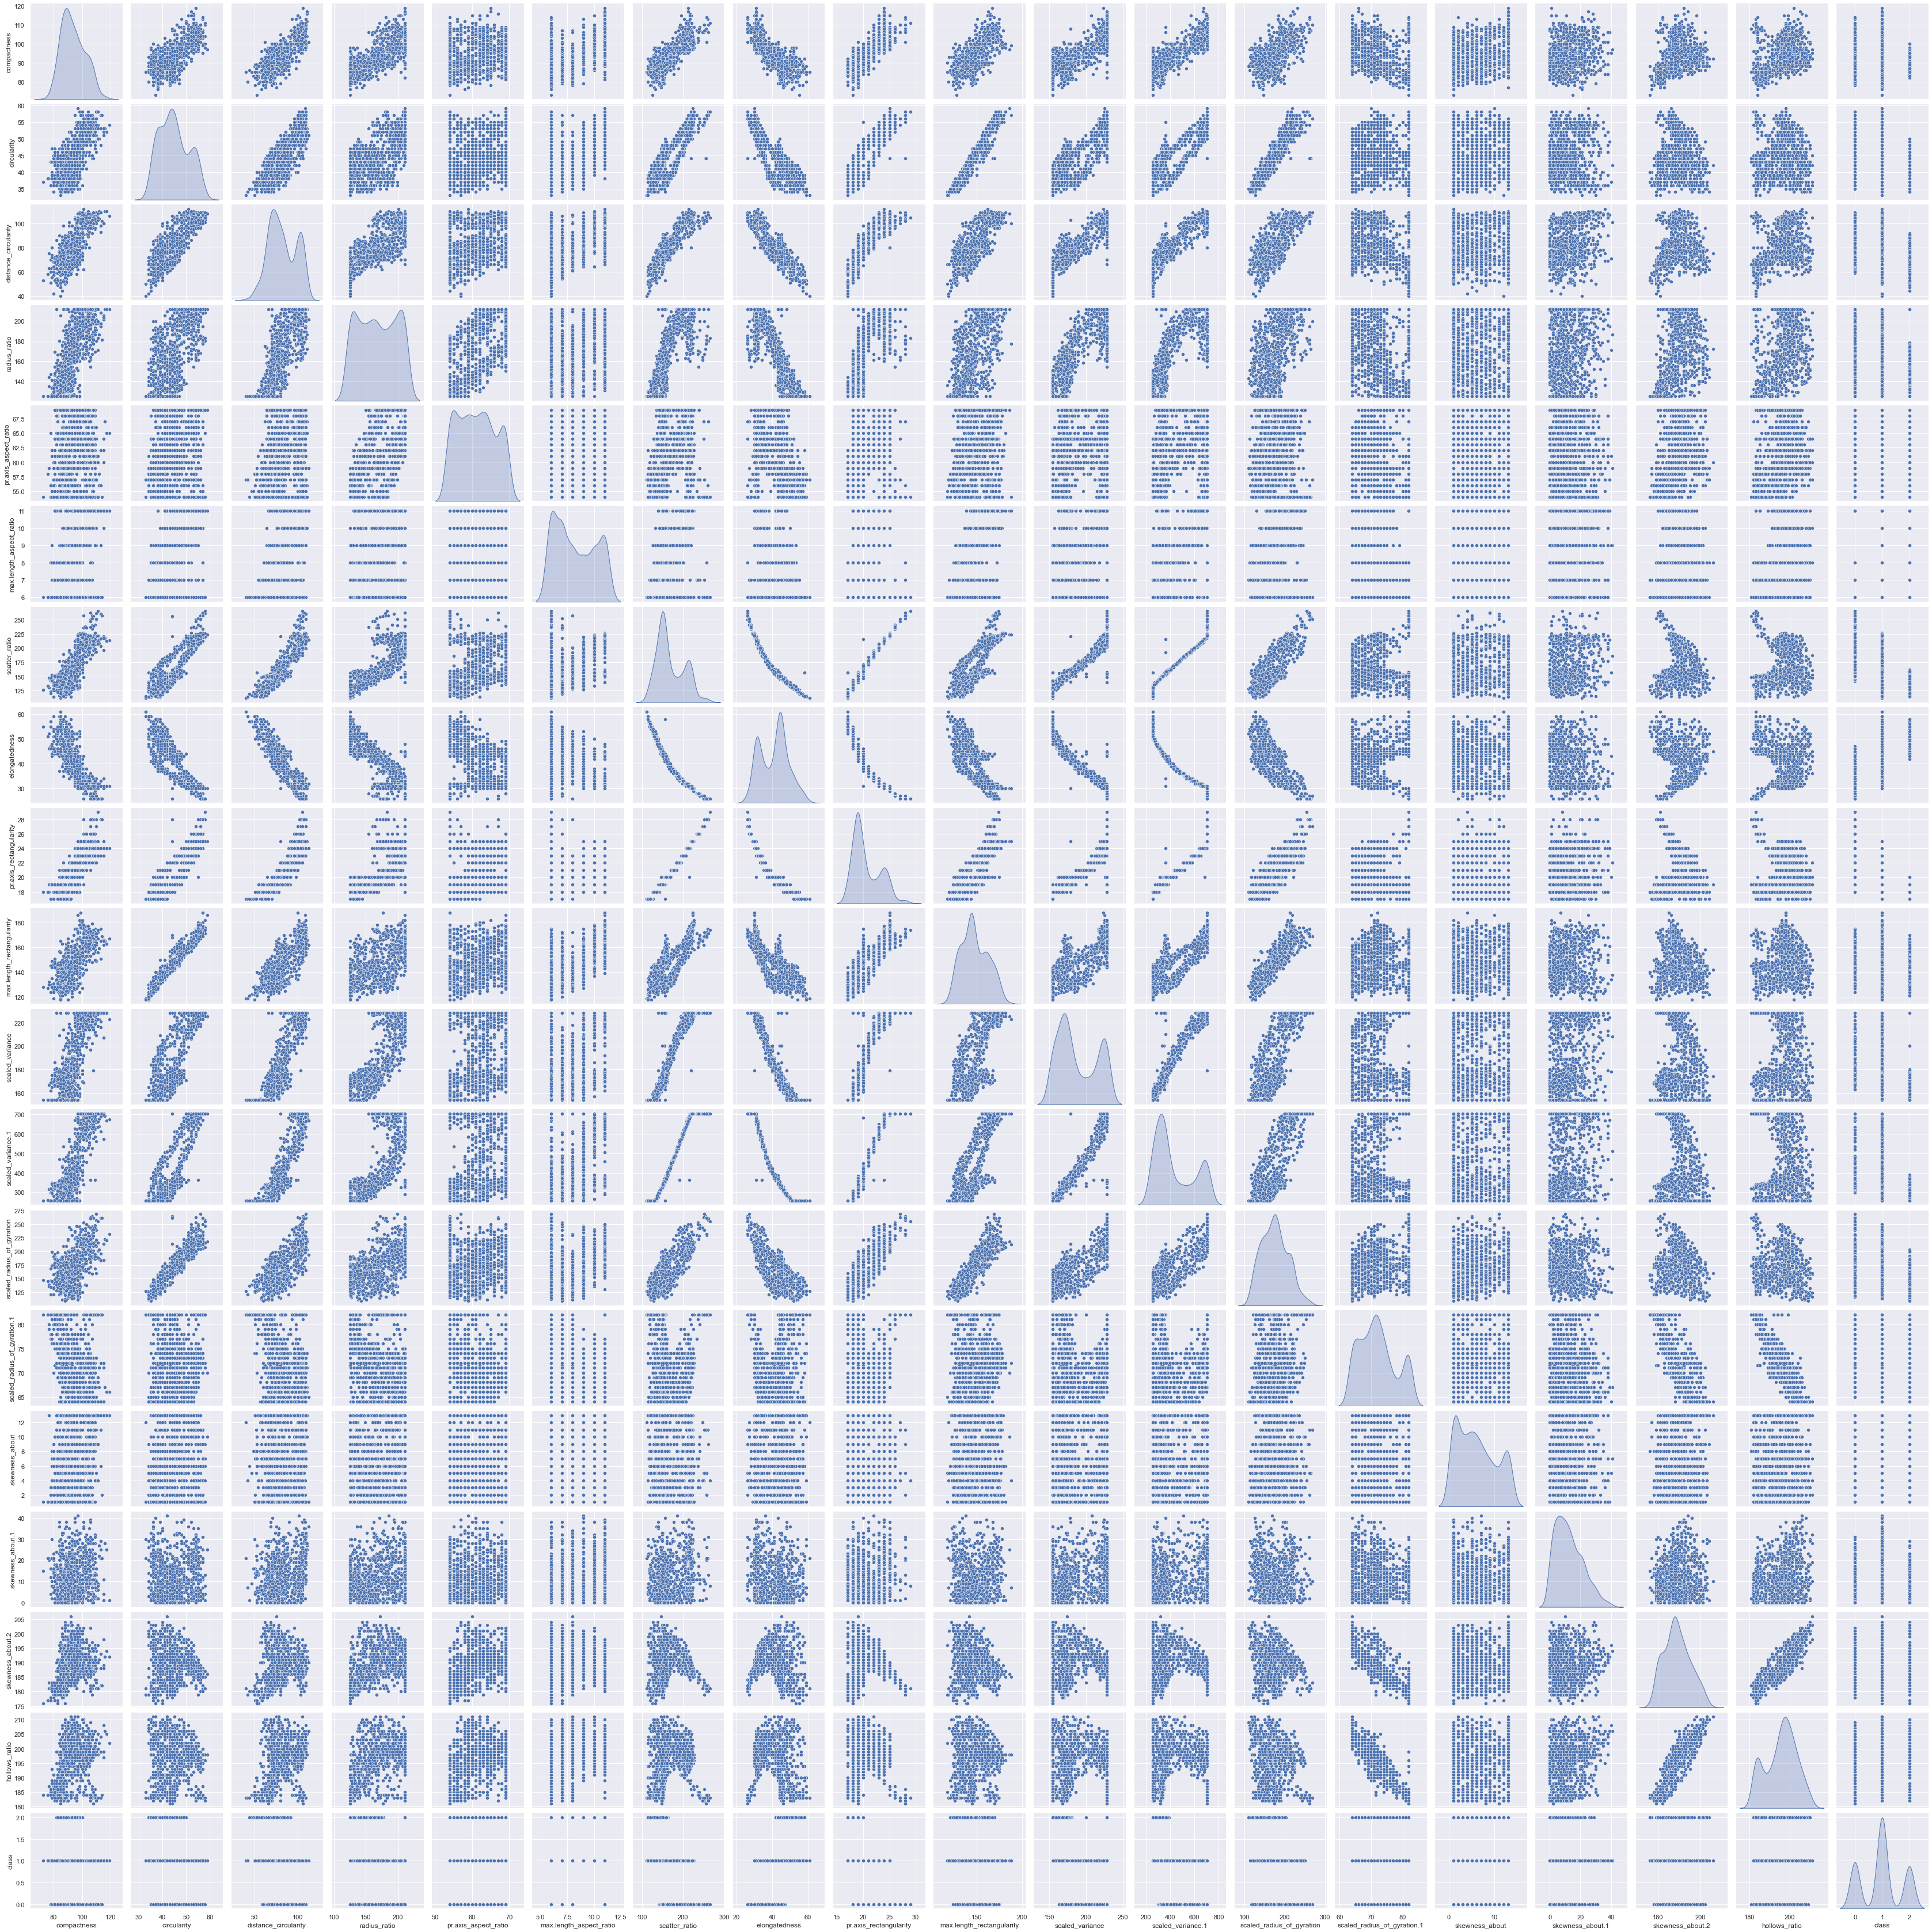

In [28]:
# to plot density curve [diag_kind='kde'] instead of histogram
sns.pairplot(automobile_data, diag_kind='kde')   # to plot density curve instead of histogram

### Observartion:
- As we observed from diagonals, some variable distibuted in two and some are in three clusters.
- circularity have postive and high co-rrelation with scaled_radius_of_gyration, max.length_rectangularity, scaled_variance.1 and scatter_ratio and negative co-relation with elongatedness.
- scatter_ratio have very high postive co-rrelation with pr.axis_rectangularity.
- scaled_variance have high positive correlation with scaled_variance.1, 
- most of variable exepect 'skewness_about', 'skewness_about.1', 'skewness_about.2', scaled_radius_of_gyration.1, 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'hollows_ratio' have high negative correlation.

### Correlation matrix to check the co-rrelation among different variables.

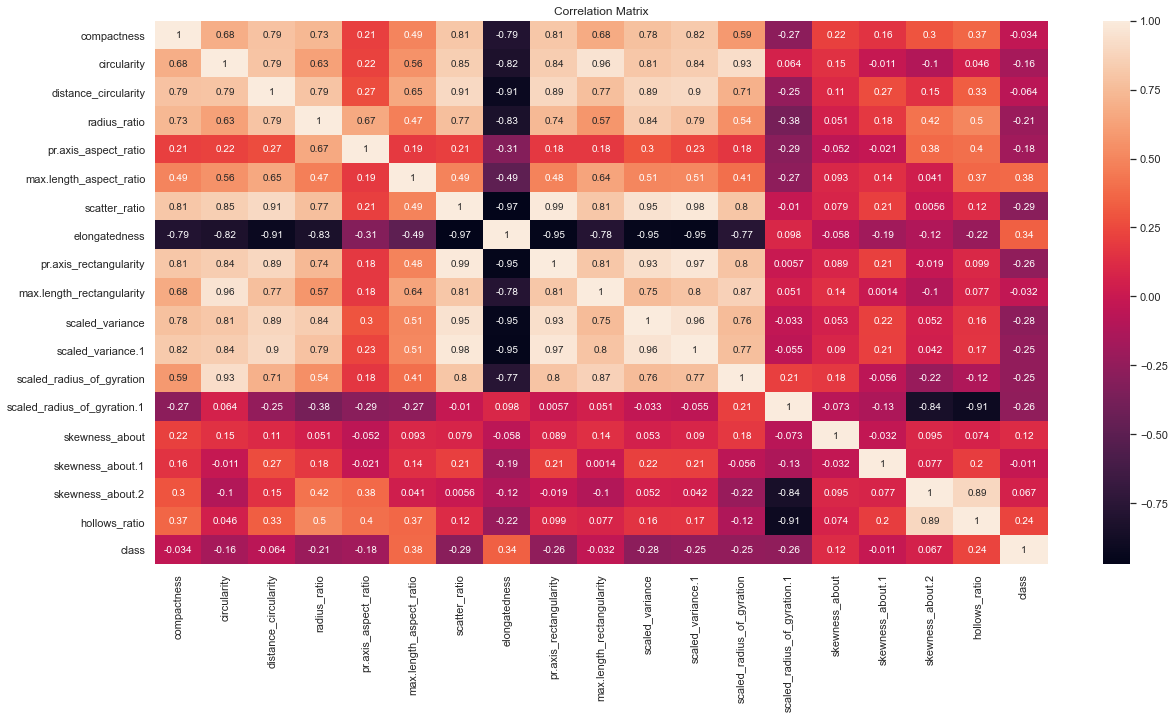

In [29]:
#check the correlation matrix
corr = automobile_data.corr()

#Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, ax=ax);

#### Observation:
- circularity have postive and high co-rrelation with scaled_radius_of_gyration, max.length_rectangularity, scaled_variance.1 and scatter_ratio and negative co-relation with elongatedness.
- scatter_ratio have very high postive co-rrelation with pr.axis_rectangularity.
- scaled_variance have high positive correlation with scaled_variance.1, 
- most of variable exepect 'skewness_about', 'skewness_about.1', 'skewness_about.2', scaled_radius_of_gyration.1, 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'hollows_ratio' have high negative correlation.

## Split the dataset into Independent and Dependant Variables

In [30]:
#import the sklearn package
from sklearn.model_selection import train_test_split

#split predictor and target variable
X = automobile_data.drop('class', axis=1)
y = automobile_data['class']

- **Defined two function for tuning and Building models.**

In [31]:
#Function defined for tuning the model parameter
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report

# model_tuning funciton
def model_tuning(model, grid, X_train_var, X_test_var):

    # define models and parameters
    sample = 10
    rand_search = RandomizedSearchCV(estimator = model, 
                                     param_distributions = param_grid,
                                     n_iter= sample,
                                     cv= 10,                                    
                                    random_state= 1)
    
    rand_result = rand_search.fit(X_train_var, y_train)
    
    # summarize results
    y_pred = rand_result.predict(X_test_var)
    print('Accuracy:',accuracy_score(y_test, y_pred))
    print("Best: %f using %s" % (rand_result.best_score_, rand_result.best_params_))

In [32]:
# Define one common funtion to impletment muliple model 
def model_evaluation(model_name, model, input_rel, X_train_var, X_test_var):    
    start = time.time()  # note the start time     
    
    ##fit model
    model.fit(X_train_var, y_train)
    
    #prediction
    ypred = model.predict(X_test_var)
    
    #model name
    print(model_name)
    
    #confusion matrix
    print(confusion_matrix (y_test, ypred))
    
    trianing_score = model.score(X_train_var, y_train)
    acc_score = accuracy_score(y_test, ypred)
    
    recall = recall_score(y_test, ypred, average='micro')
    precision = precision_score(y_test, ypred, average='micro')
    f1 = f1_score(y_test,ypred, average='micro')
    
    end = time.time()  #note the end time
    duration = end - start  # calculate the total duration
    
    #Store the accuracy results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Model_Name':[model_name], 'trianing_score': trianing_score, 
                              'accuracy': acc_score, 'precision': precision, 
                              'recall': recall, 'f1-score': f1, 'duration':duration })  
        
    resultsDf = pd.concat([input_rel, tempResultsDf])    
    resultsDf1 = resultsDf[['Model_Name', 'trianing_score', 'accuracy', 'precision', 'recall', 'f1-score', 'duration']]
    return resultsDf1, model

### Split the dataset into training and test

In [33]:
#Split the data into training and test set [80% training and 20% for test]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 45)

- **Split data into two sets. 20% testing and 80% training.**

### Scaling the Data

In [34]:
#scale the data
# Since the data have different scale. apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test) 

- **Applied standard scaller to both train and test data to scale the predictors variables.**

## 3. Build SVC Model with all atributes

In [35]:
#import SVC model class
from sklearn.svm import SVC
svc_model1 = SVC()

#fit the model without tuning any hyper parameters
svc_model1.fit(X_train_sd, y_train)

SVC()

In [36]:
#predition
prediction = svc_model1.predict(X_test_sd)

In [37]:
# check the accuracy on the training set
print('Training Score', svc_model1.score(X_train_sd, y_train))
print('Test Score',svc_model1.score(X_test_sd, y_test))

Training Score 0.9837278106508875
Test Score 0.9588235294117647


- **Both train and test accuracy is good with the original data.**

### Tuning the Model hyperparameter

In [38]:
## get the hyper parametes of SVC model
svc_model1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [39]:
#tune the model when pipe line define, pipe line model alish name should be use in hyper param
#SVC model
model = SVC()
param_grid = {'C': [0.001, 0.1 , 0.7, 0.9, 1.0], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'random_state':[1]}

#call the tuning parametes of the model
model_tuning(model, param_grid, X_train_sd, X_test_sd)

Accuracy: 0.9470588235294117
Best: 0.971905 using {'random_state': 1, 'kernel': 'rbf', 'gamma': 0.1, 'C': 0.9}


In [40]:
#SVC() model
resultsDf = pd.DataFrame()
result_out = pd.DataFrame()

svc = SVC( kernel='rbf', gamma = 0.1, C = 0.9, random_state=1)
result_out, svc_object = model_evaluation('SVC', svc, result_out, X_train_sd, X_test_sd)
result_out

SVC
[[42  1  3]
 [ 0 85  5]
 [ 0  0 34]]


Model_Name  trianing_score  accuracy  precision    recall  f1-score  \
0        SVC        0.985207  0.947059   0.947059  0.947059  0.947059   

   duration  
0  0.047698

- **Form above model stats we can observe the moldel accuracy in nearly 95% and recal, precision and f1-score also nealry 95%.**

## 4. Apply Dimensional reduction (Using PCA):

### Generate covarince matrix and eigen value of PCA analysis

In [41]:
##Covariance matrix
covMatrix = np.cov(X_train_sd.T, rowvar=False)
print(covMatrix)

[[ 0.74426835  0.80032941 -0.38065977 ...  0.00745849 -0.17155058
   0.08952634]
 [ 0.80032941  1.21002358 -0.70976711 ...  0.10205408  0.08723116
  -0.20970896]
 [-0.38065977 -0.70976711  0.61010214 ... -0.07988255 -0.29712416
   0.35540543]
 ...
 [ 0.00745849  0.10205408 -0.07988255 ...  0.60724938 -0.01078964
   0.07338697]
 [-0.17155058  0.08723116 -0.29712416 ... -0.01078964  0.53515169
  -0.48065523]
 [ 0.08952634 -0.20970896  0.35540543 ...  0.07338697 -0.48065523
   0.60183867]]


In [42]:
#Apply PCA on all the independent variables
pca = PCA(n_components=18)
pca.fit(X_train_sd)

PCA(n_components=18)

In [43]:
#eigen value
print(pca.explained_variance_) 

[9.83487958e+00 3.29934248e+00 1.19881089e+00 1.13710463e+00
 8.67261467e-01 6.56514150e-01 3.23933595e-01 2.24862626e-01
 1.27982531e-01 8.85146414e-02 7.09323684e-02 5.90657358e-02
 3.76468702e-02 3.20741688e-02 2.79946299e-02 1.98634564e-02
 1.58501521e-02 4.03269744e-03]


In [44]:
#eigen vector
print(pca.components_) 

[[ 0.27348651  0.28514561  0.30151096  0.27109513  0.11015376  0.19506957
   0.30797412 -0.30681488  0.30425747  0.27544158  0.30449287  0.30813935
   0.25896914 -0.04614976  0.04338562  0.06272281  0.03880732  0.08776409]
 [-0.08031578  0.14381783 -0.03773504 -0.19742966 -0.24121794 -0.06724486
   0.07877285 -0.01788166  0.08974245  0.13964286  0.03732956  0.04883444
   0.22450599  0.50404431 -0.01552019 -0.09922176 -0.50876351 -0.50843744]
 [ 0.02055484 -0.17961726  0.11844286 -0.08706019 -0.38036568  0.06922363
   0.09086274 -0.04179947  0.10312574 -0.14473286  0.07986967  0.08901305
  -0.2205285  -0.00114733 -0.25899206  0.78332157 -0.10444105  0.01170971]
 [ 0.15151284  0.06319341  0.04933317 -0.24224354 -0.47456747  0.25089628
  -0.05117033  0.10404933 -0.03041898  0.12943714 -0.10625612 -0.03763365
   0.03505715 -0.13647431  0.7398004   0.03496327  0.0314271   0.10282001]
 [ 0.13632419 -0.14395064 -0.0797153   0.14907391  0.11086485 -0.68328379
   0.1142852  -0.10695807  0.11083

In [45]:
#percentage of variance explained by eigen vector
print(pca.explained_variance_ratio_)

[5.45573941e-01 1.83025655e-01 6.65020834e-02 6.30790292e-02
 4.81099187e-02 3.64190542e-02 1.79696890e-02 1.24738882e-02
 7.09962265e-03 4.91020570e-03 3.93485771e-03 3.27657558e-03
 2.08839887e-03 1.77926232e-03 1.55295654e-03 1.10189292e-03
 8.79261396e-04 2.23707328e-04]


Text(0.5, 0, 'eigen Value')

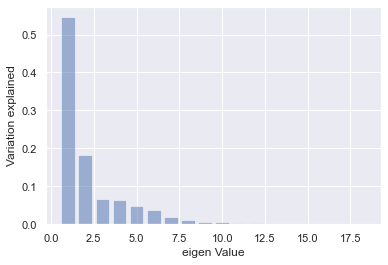

In [46]:
plt.bar(list(range(1,19)), pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')

- **As we can observed from data nearly 55% of variance explained by the first variable, second variable nealry 19% and so on.**

Text(0.5, 0, 'eigen Value')

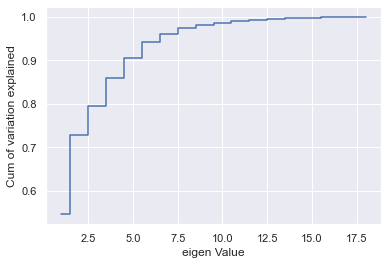

In [47]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')

- **From variance analysis we observed if we consider 8 variables it ll explain the variance upto 98%. Rest of variables can be removed for modeing.**

- **Now 8 dimensions seems very reasonable. With 8 variables we can explain over 98% of the variation in the original data!**

### PCA with 8 Variables:

In [48]:
pca_8 = PCA(n_components = 8)
pca_8.fit(X_train_sd)
print(pca_8.components_)
print(pca_8.explained_variance_ratio_)

#apply on tain and test data
X_train_pca_8 = pca_8.transform(X_train_sd)
X_test_pca_8 = pca_8.transform(X_test_sd)

[[ 0.27348651  0.28514561  0.30151096  0.27109513  0.11015376  0.19506957
   0.30797412 -0.30681488  0.30425747  0.27544158  0.30449287  0.30813935
   0.25896914 -0.04614976  0.04338562  0.06272281  0.03880732  0.08776409]
 [-0.08031578  0.14381783 -0.03773504 -0.19742966 -0.24121794 -0.06724486
   0.07877285 -0.01788166  0.08974245  0.13964286  0.03732956  0.04883444
   0.22450599  0.50404431 -0.01552019 -0.09922176 -0.50876351 -0.50843744]
 [ 0.02055484 -0.17961726  0.11844286 -0.08706019 -0.38036568  0.06922363
   0.09086274 -0.04179947  0.10312574 -0.14473286  0.07986967  0.08901305
  -0.2205285  -0.00114733 -0.25899206  0.78332157 -0.10444105  0.01170971]
 [ 0.15151284  0.06319341  0.04933317 -0.24224354 -0.47456747  0.25089628
  -0.05117033  0.10404933 -0.03041898  0.12943714 -0.10625612 -0.03763365
   0.03505715 -0.13647431  0.7398004   0.03496327  0.0314271   0.10282001]
 [ 0.13632419 -0.14395064 -0.0797153   0.14907391  0.11086485 -0.68328379
   0.1142852  -0.10695807  0.11083

In [49]:
X_train_pca_8

array([[ 4.35739691,  1.24043031,  0.86750435, ...,  0.96072254,
        -0.49907024, -0.15573298],
       [ 5.44521981,  0.40374426, -0.30078084, ...,  0.50076548,
        -0.29722555,  0.12735411],
       [-3.2024898 ,  0.68070572,  0.40754994, ..., -0.00763484,
        -0.74878718,  0.28686693],
       ...,
       [-1.11224879,  0.36377831, -0.6381561 , ...,  1.57548683,
         0.79538531,  0.38512624],
       [ 0.32985424, -1.70228207, -1.30704282, ..., -0.36821071,
         0.40580516, -0.27704686],
       [-0.94594715,  1.34773686,  0.92450097, ...,  1.25950352,
        -0.2396103 , -0.39175471]])

Text(0.5, 0, 'eigen Value')

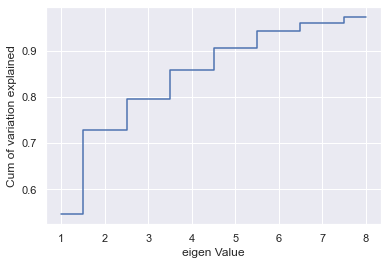

In [50]:
plt.step(list(range(1,9)),np.cumsum(pca_8.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')

- **As we can see from above Vairance explained graph, with 8 it explain the variance nealy 98%.**

In [51]:
#chnage the vectors to dataframe
X_train_pca = pd.DataFrame(X_train_pca_8)
X_test_pca = pd.DataFrame(X_test_pca_8)

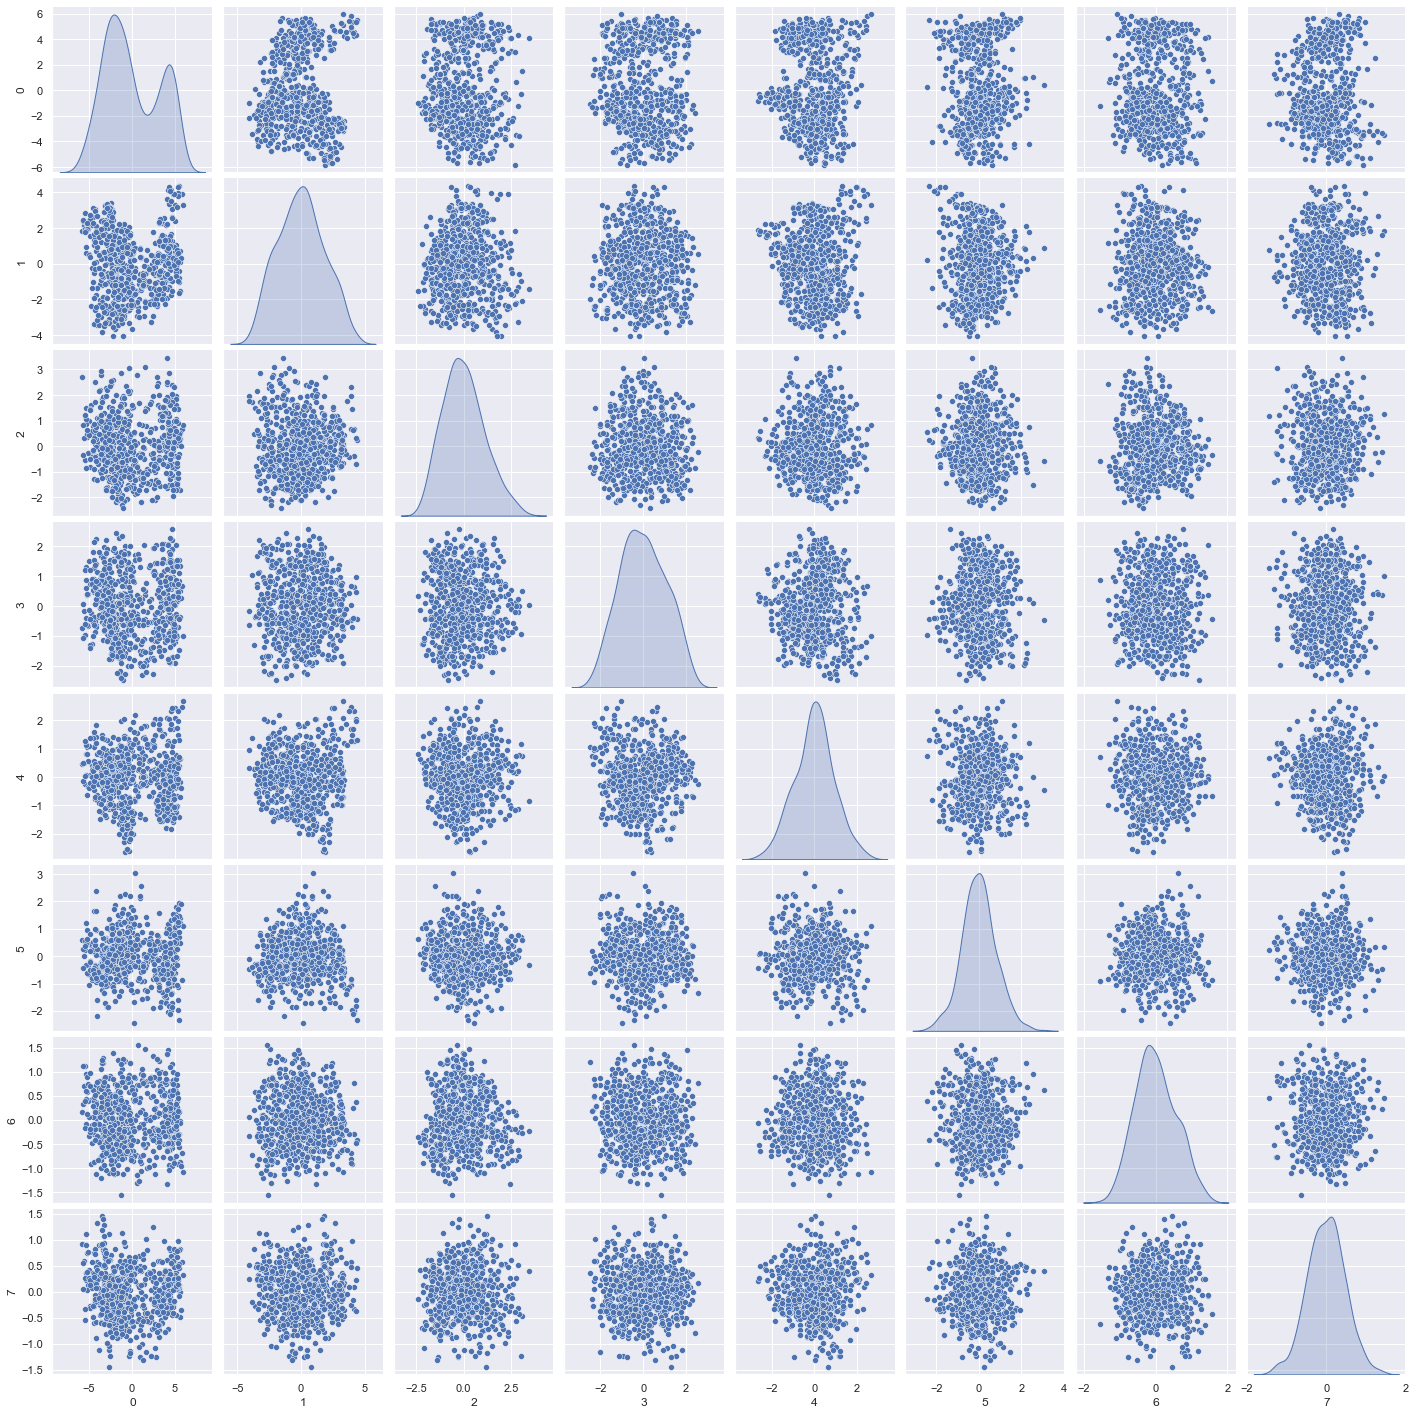

In [52]:
#pair plot
sns.pairplot(X_train_pca, diag_kind='kde')

### Correlaiton Matrix

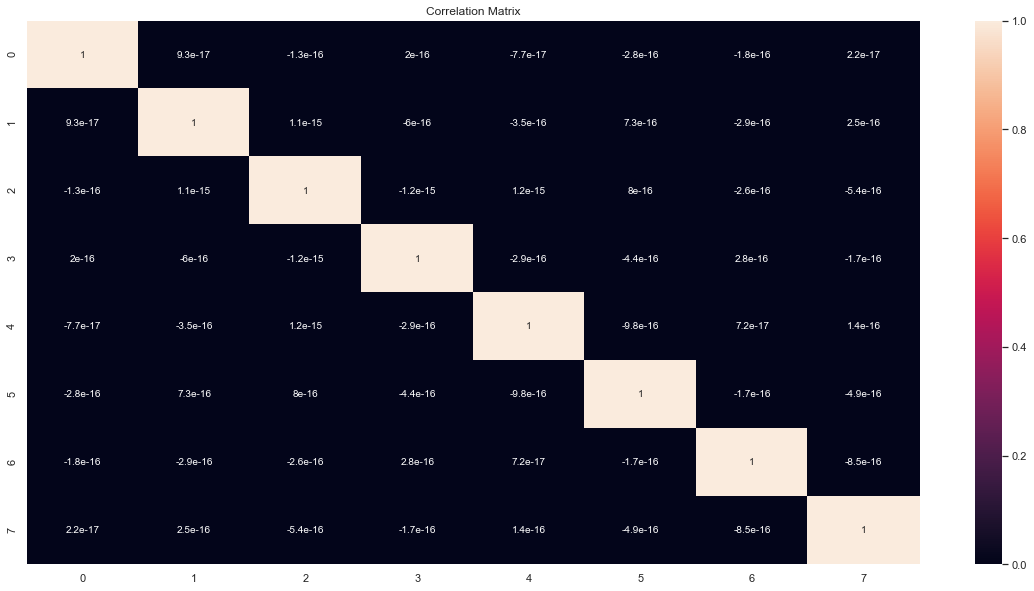

In [53]:
#check the correlation matrix
corr = X_train_pca.corr()

#Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, ax=ax);

- **From pair plot and correlation matrix we observed there is no high co-rrelation in data.**

## 5. SVM classier using dimensionally reduced attributes. 

In [54]:
#SVC model
model1 = SVC()
param_grid = {'C': [0.1, 0.7, 0.9, 1.0,], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
model_tuning(model1, param_grid, X_train_pca, X_test_pca)

Accuracy: 0.9470588235294117
Best: 0.946730 using {'kernel': 'rbf', 'gamma': 0.1, 'C': 0.9}


In [55]:
#SVC() model
resultsDf = pd.DataFrame()
result_out = pd.DataFrame()

svc1 = SVC( kernel='rbf', gamma = 0.1, C = 0.9, random_state=1)
result_out, svc_object = model_evaluation('SVC', svc1, result_out, X_train_pca, X_test_pca)
result_out

SVC
[[44  0  2]
 [ 0 84  6]
 [ 0  1 33]]


Model_Name  trianing_score  accuracy  precision    recall  f1-score  \
0        SVC        0.971893  0.947059   0.947059  0.947059  0.947059   

   duration  
0  0.068097

### Observation:
- **From model score we observed after dimentional reduction the model score nearly same.**


## 6. Conclusion

- As we saw the SVC model before dimentional reduction and after dimentional reduction nealy same, No much variation.
- Also we checked before dimention reduction many variables have high correlation.
- So it better we can reduce the dimention which is not impacting our model accuracy and performance.Sicne the dimention reduced from 18 to 8, it easy to maintain the model in production, performance of model will be better since the data size decreased and also help to re-train the model in future if more variety of data observed.